The purpose of this assignment is to create a database connection and import csv file and conduct data wrangling and analysis.
Firstly a database named 60assignment8 has been created in mysql workbench. A table named UNEMPLOYMENT_DEM_REP_STATE is created through import wizard which contains data regarding unemployment countywise from five states named Mississippi,Illinois,Delaware,Minnesota,Oklahoma.

## Research Question
This analysis is going to focus if the unemployment rate is higher in states that have republican inclination than the states that have democratic party inclination. Oklahoma and Mississippi are republican states. And, Illinois,Delaware, Minnesota have trends for voting for democratic candidates in the presidential election

In [1]:
conda install -c anaconda mysql-connector-python

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\malia\Anaconda3

  added / updated specs:
    - mysql-connector-python


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         159 KB  anaconda
    certifi-2020.6.20          |           py37_0         160 KB  anaconda
    conda-4.10.1               |   py37haa95532_1         2.9 MB
    libprotobuf-3.6.0          |       h1a1b453_0         2.0 MB  anaconda
    mysql-connector-c-6.1.11   |       h33f27b4_1         5.1 MB  anaconda
    mysql-connector-python-8.0.18|   py37h13ed8b8_1         596 KB  anaconda
    protobuf-3.6.0        

In [3]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="Maliat2021"
)

print(mydb)

## Database Connection
Connection to mysqlserver has is created using mysqlconnector.The dataset is imported.


In [4]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="Maliat2021",
  database="602assignment8"
)

mycursor = mydb.cursor()
sql = "SELECT * FROM UNEMPLOYMENT_DEM_REP_STATE"
mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(2015, 'February', 'Mississippi', 'Newton County', 6.1)
(2015, 'February', 'Mississippi', 'Panola County', 9.4)
(2015, 'February', 'Mississippi', 'Monroe County', 7.9)
(2015, 'February', 'Mississippi', 'Hinds County', 6.1)
(2015, 'February', 'Mississippi', 'Kemper County', 10.6)
(2015, 'February', 'Mississippi', 'Calhoun County', 6.9)
(2015, 'February', 'Mississippi', 'Clarke County', 7.9)
(2015, 'February', 'Mississippi', 'Jefferson County', 14.3)
(2015, 'February', 'Mississippi', 'Madison County', 4.5)
(2015, 'February', 'Mississippi', 'Sharkey County', 11.1)
(2015, 'February', 'Mississippi', 'Tunica County', 11.5)
(2015, 'February', 'Mississippi', 'Tate County', 7.6)
(2015, 'February', 'Mississippi', 'Lafayette County', 5.5)
(2015, 'February', 'Mississippi', 'Bolivar County', 8.6)
(2015, 'February', 'Mississippi', 'Stone County', 7.6)
(2015, 'February', 'Mississippi', 'Noxubee County', 10.6)
(2015, 'February', 'Mississippi', 'Lamar County', 4.7)
(2015, 'February', 'Mississippi', 'Le

## Data Wrangling
However as the dataset is not imported as a dataframe, it is converted into a pandas dataframe. And, column name is also added.

In [5]:
import pandas as pd

In [6]:
newdf = pd.DataFrame(myresult)

In [7]:
newdf

,0,1,2,3,4
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6
...,...,...,...,...,...
346,2015,February,Illinois,Cook County,6.7
347,2015,February,Illinois,Jo Daviess County,6.8
348,2015,February,Illinois,Hamilton County,5.8
349,2015,February,Illinois,Will County,7.0


In [18]:

newdf.columns =['Year', 'Month', 'State', 'County','UnemploymentRate']

In [19]:
newdf.head()

,Year,Month,State,County,UnemploymentRate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


## Data Exploration and Data Visualization
Summary statistics has been rendered. Unemployment rates between these five states have been analyzed. The difference in unemployment rate among the states are not significant. Mississipi which is a republican state  has a higher rate of unemployment, however Oklahoma which is also a republican state has lower unemployment than its' peers. This shows more data is needed to support the research question.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport
%matplotlib inline
plt.style.use("ggplot")

In [21]:
newdf.describe( include="all")

,Year,Month,State,County,UnemploymentRate
count,351.0,351,351,351,351.000000
unique,NaN,1,5,304,NaN
top,NaN,February,Illinois,Jackson County,NaN
freq,NaN,351,102,4,NaN
mean,2015.0,NaN,NaN,NaN,6.278348
std,0.0,NaN,NaN,NaN,2.140090
min,2015.0,NaN,NaN,NaN,2.100000
25%,2015.0,NaN,NaN,NaN,4.950000
50%,2015.0,NaN,NaN,NaN,6.100000
75%,2015.0,NaN,NaN,NaN,7.350000


In [14]:
state_=newdf.State.unique()
state_

array(['Mississippi', 'Oklahoma', 'Delaware', 'Minnesota', 'Illinois'],
      dtype=object)

C:\Users\malia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


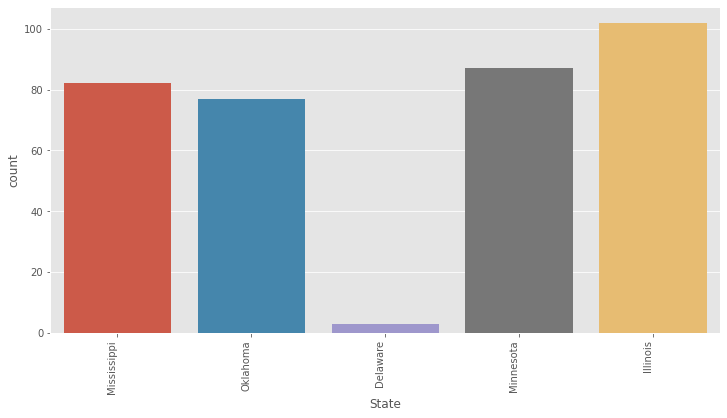

In [16]:
#Countplot on the states
plt.figure(figsize=(12,6))
g = sns.countplot(newdf['State'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.show()

Analyzing the states and unemployment rates.

In [27]:
state_rate=newdf[['State', 'UnemploymentRate']]
state_rate_= state_rate.groupby(['State'],as_index=False).mean()
state_rate_=state_rate_.sort_values(['UnemploymentRate'], ascending=False)
state_rate_

,State,UnemploymentRate
3,Mississippi,7.975610
1,Illinois,6.625490
0,Delaware,5.633333
2,Minnesota,5.619540
4,Oklahoma,4.780519


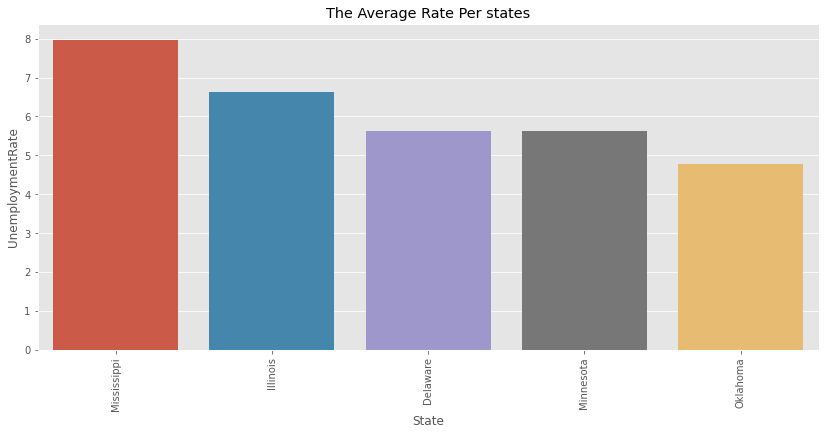

In [28]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x='State', y='UnemploymentRate', data=state_rate_, ax=ax)
plt.title('The Average Rate Per states')
plt.xticks(rotation='vertical')
plt.show()

## Conclusion:
More data is needed to support the notion that Republican states have higher unemployment rate than the Democratic states.